In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sample_submission = pd.read_csv('JosephSchambach/Kaggle-SpaceShip-Titanic-Competition/sample_submission.csv')
sample_submission

FileNotFoundError: [Errno 2] No such file or directory: 'JosephSchambach/Kaggle-SpaceShip-Titanic-Competition/sample_submission.csv'

In [8]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

test_df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

Looking at the top ten rows from the dataframe above, we can see that our output variable is Destination while our other variables are predictors. 

In [ ]:
test_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [ ]:
test_df.shape

(4277, 13)

In [ ]:
destinations = test_df[["PassengerId","Destination"]]

print(destinations["Destination"].nunique())
print(destinations["Destination"].unique())
destinations["Destination"].value_counts()

3
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]


TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [ ]:
print(f'{destinations["Destination"].isna().sum()} null values')

print(f'{destinations["Destination"].value_counts().sum() + destinations["Destination"].isna().sum()} of {len(destinations)} total records')

print(f'Null values are {100*(destinations["Destination"].isna().sum() / len(destinations["Destination"]))}% of the total')

92 null values
4277 of 4277 total records
Null values are 2.1510404489127897% of the total


Because null values in the output variable are only 2.15% of the total values, we will drop these records from the dataframe. 

We were able to observe three unique values within the output variable- TRAPPIST-1e, 55 Cancri e, PSO J318.5-22, with TRAPPIST having the most at nearly 3,000 of the records. This is good information to have going into the prediction analysis as we will have to take into consideration the heavier occurrence of TRAPPIST among the outputs. 

In [ ]:
test_df = test_df.dropna(subset=["Destination"])
test_df.isna().sum()

PassengerId       0
HomePlanet       85
CryoSleep        90
Cabin           100
Destination       0
Age              86
VIP              90
RoomService      81
FoodCourt       106
ShoppingMall     95
Spa              99
VRDeck           74
Name             94
dtype: int64

In [ ]:
print(test_df.shape)
test_df.head()

(4185, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


We might want to look at the distribution through a scatter plot of the output variable destination to help us get an intuition regarding our values. 

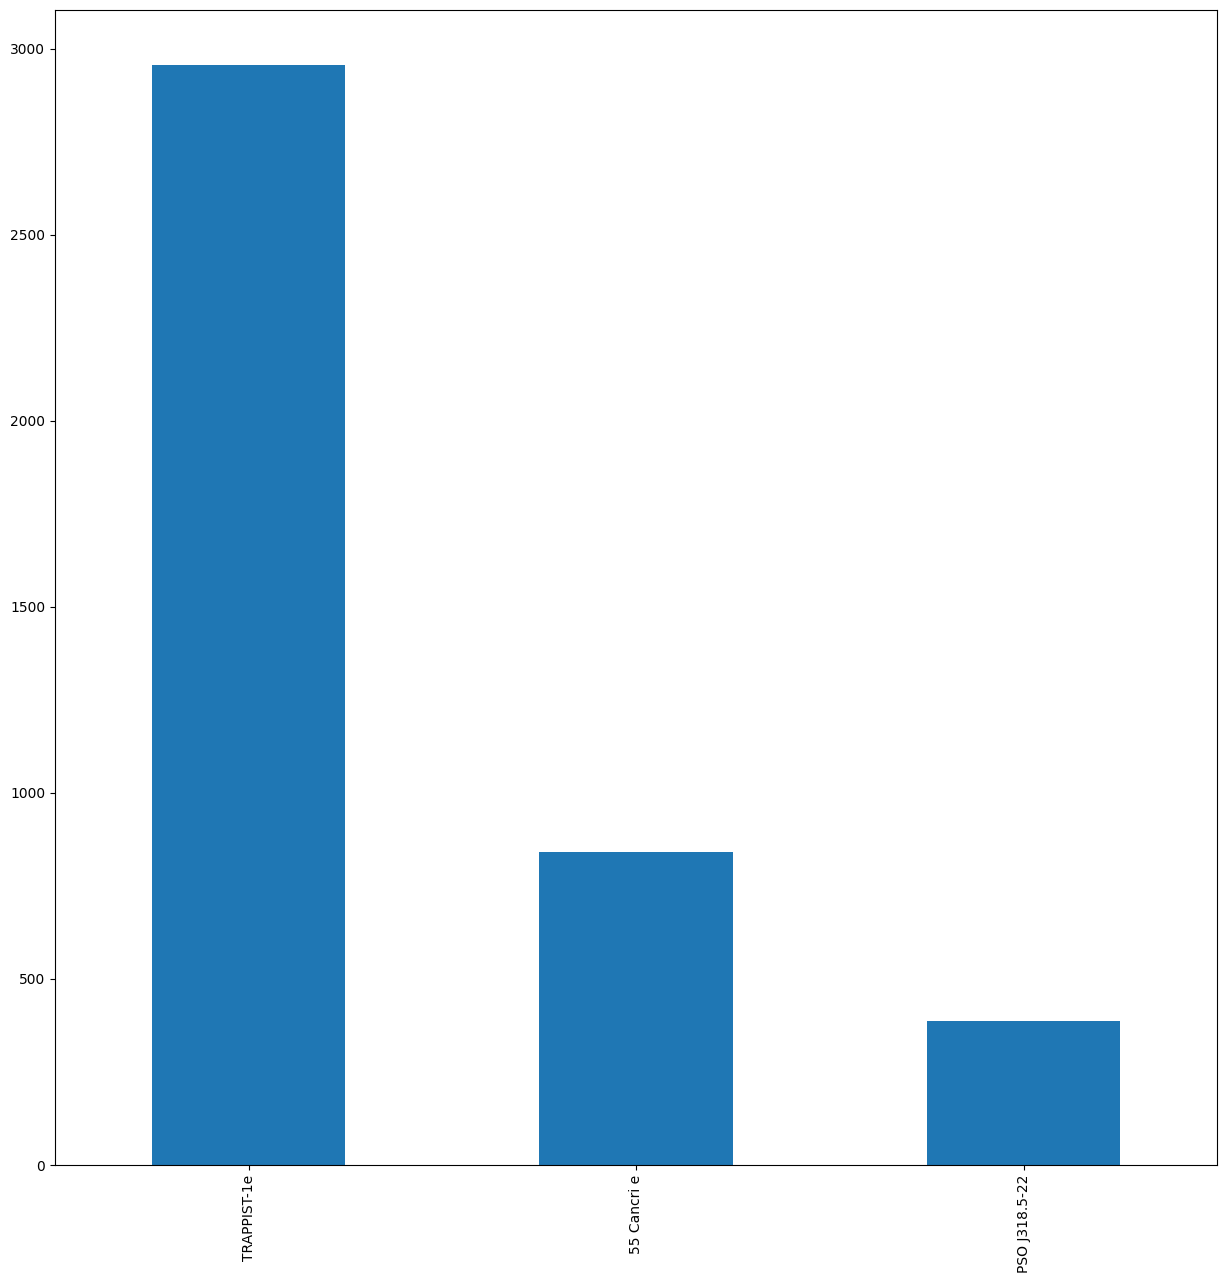

In [ ]:
destination_counts = test_df["Destination"].value_counts()

plt.figure(figsize=(15,15))
destination_counts.plot(kind="bar")
plt.show()

Now that we have dropped the null values from the test dataframe, we can look for null values in the other columns. 

We also see that we have a heavy distribution towards TRAPPIST, which means we will likely need to keep this in mind when training the model since we might have an unfair emphasis from this destination. 

In [ ]:
print("Count of null values by column:")
for col in test_df.columns:
    print(f'{col}: {test_df[col].isna().sum()}')
print("Percentage of null values by column:")
for col in test_df.columns:
    print(f'{col}: {round(100*(test_df[col].isna().sum() / len(test_df)),2)}%')

Count of null values by column:
PassengerId: 0
HomePlanet: 85
CryoSleep: 90
Cabin: 100
Destination: 0
Age: 86
VIP: 90
RoomService: 81
FoodCourt: 106
ShoppingMall: 95
Spa: 99
VRDeck: 74
Name: 94
Percentage of null values by column:
PassengerId: 0.0%
HomePlanet: 2.03%
CryoSleep: 2.15%
Cabin: 2.39%
Destination: 0.0%
Age: 2.05%
VIP: 2.15%
RoomService: 1.94%
FoodCourt: 2.53%
ShoppingMall: 2.27%
Spa: 2.37%
VRDeck: 1.77%
Name: 2.25%


We are able to see that no columns contain more than 2.53% null values, however, this does not mean we can simply drop all of the rows with null values as this could result in a substantial drop of rows if, for example, none of the rows coincide with other null values in a different column. We need to assess the potential damage. 

Looking at name, we likely do not need this column at all as these are simply names and if there is any correlation, it is likely a false lead. We will drop this column. 

In [ ]:
test_df = test_df.drop(labels="Name",axis=1)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


We will not drop the PassengerId column, although this seems like it could be dropped, because the first four numbers are signifiers of a group, which might deprive us of a valuable metric. We will split this column into two metrics, the group and the ID, then we will drop the PassengerId and the ID columns. 

In [ ]:
test_df[["GroupId","ID"]] = test_df["PassengerId"].str.split(pat='_',expand=True)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,ID
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01


In [ ]:
test_df = test_df.drop(labels=["PassengerId","ID"],axis=1)
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023


With these removed, we should investigate the columns more fully- specifically to determine the importance of the null values and whether we can drop them or if we have to keep them. 

We will begin with HomePlanet. 

In [ ]:
test_df["HomePlanet"].value_counts()

Earth     2218
Europa     982
Mars       900
Name: HomePlanet, dtype: int64

We had 85 null values in this particular column and we see a 50-25-25 split for three home planet categories: Earth, Europa, and Mars. Since there are not many null variables. We will attempt to look at a few columns where the HomePlanet is null and see how many of the other columns also conain null values. 

In [ ]:
test_df[test_df["HomePlanet"].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
276,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,0616
340,NaN,False,F/135/S,TRAPPIST-1e,44.0,False,14.0,0.0,1817.0,2.0,171.0,0730
450,NaN,False,F/171/S,TRAPPIST-1e,20.0,False,0.0,4.0,0.0,732.0,1.0,0936
464,NaN,False,F/180/S,TRAPPIST-1e,19.0,False,1.0,0.0,0.0,0.0,632.0,0967
481,NaN,False,F/192/S,TRAPPIST-1e,23.0,False,0.0,458.0,151.0,256.0,0.0,1021
...,...,...,...,...,...,...,...,...,...,...,...,...
3957,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,8621
3980,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,8678
4032,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,8775
4159,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,9025


Looking at this does not seem to give us much as far as null values cross columns, but we can look at a few columns against the HomePlanet column to see if there are many overlaps. 

In [ ]:
test_df[test_df["HomePlanet"].isna() & test_df["FoodCourt"].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
991,NaN,True,G/332/P,PSO J318.5-22,6.0,False,0.0,NaN,0.0,0.0,0.0,2057
3945,NaN,True,C/322/S,55 Cancri e,25.0,False,0.0,NaN,0.0,0.0,0.0,8576


In [ ]:
test_df.loc[test_df["HomePlanet"].isna() & test_df["ShoppingMall"].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
276,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,0616
488,NaN,True,G/157/P,TRAPPIST-1e,NaN,False,0.0,0.0,NaN,0.0,0.0,1050
3093,NaN,True,A/83/S,55 Cancri e,59.0,False,0.0,0.0,NaN,0.0,0.0,6781


These do not seem to offer much overlap between columns in terms of null values, which would seem to discourage dropping all. Dropping all rows with null values could take away up to 25% of our data, leaving us with roughly 3139 rows left. 

Due to the fact that we may have such a large amount of null values in the dataset which are indepent of null values in other columns, we might not want to impute values to these records since that could skew the data. 

We can test just how many null values are in the dataset by dropping all null values in one dataset and then subtracking the total records of the original from the total records of the un-nulled dataset. 

## Drop Null Values and store in a new dataframe before cleaning

In [4]:
nn_test_df = test_df.dropna(axis=0,inplace=False)
for col in nn_test_df:
    print(f'{col}: {nn_test_df[col].isna().sum()}')

NameError: name 'test_df' is not defined

We have confirmed the dropping of null values from the dataframe. Let's check two elements before proceeding:
1. Did we accidentally drop null values from the other dataframe?
2. How many rows did this result in us dropping?

In [3]:
for col in test_df:
    print(f'{col}: {test_df[col].isna().sum()}')
print('\n')
print(nn_test_df.shape,'\n')
print(len(test_df) - len(nn_test_df))

NameError: name 'test_df' is not defined

We dropped 830 records, or nearly 20% of our total data. This does not give me confidence to impute values to these records as that would mean roughly 1/5 across all rows would contain a null value. I'll keep the original test.csv the same, but going forward I will use the nn_test_df stored in a new csv for future analysis and modeling. 

Since we have cleaned the data of null values, we can look at our columns for more information on data types, see if we need to make any adjustments or change the datatype. 

In [ ]:
nn_test_df.dtypes

NameError: name 'nn_test_df' is not defined

In [ ]:
nn_test_df.head(10)

NameError: name 'nn_test_df' is not defined